In [18]:
using Turing, AdvancedVI, Distributions, Random, Plots, LinearAlgebra, DelimitedFiles
using ReverseDiff, Memoization
using StatsFuns

Random.seed!(1234);
Turing.setadbackend(:reversediff);
Turing.setrdcache(true);

In [19]:
sunspot = readdlm("data/SN_y_tot_V2.0.csv", ';')
select_1945_2020 = filter((s) -> s[1] > 1945 && s[1] < 2021, collect(eachrow(sunspot)))
dataset = map((s) -> round(s[2]), select_1945_2020);
not_rounded = map((s) -> s[2], select_1945_2020);


In [20]:
N = length(dataset);

In [21]:
@model model(y) = begin
    n = length(y)
    b ~ Gamma(1000,1)
    z = Vector{Float64}(undef, N)
    z[1] ~ Gamma(1, 1/b) # Shape Scale parameterization in Distributions.jl
    y[1] ~ Poisson(z[1])
    for i = 2:n
        z[i] ~ Gamma(softplus(z[i-1]), 1/b)
        y[i] ~ Poisson(z[i])
    end
end

model (generic function with 2 methods)

In [22]:
# Instantiate model
sc_model = model(dataset);

In [23]:
runtime = @elapsed chain = sample(sc_model, NUTS(200, 0.65), 1000);

Sampling   0%|                                          |  ETA: N/A


┌ Info: Found initial step size
│   ϵ = 0.05
└ @ Turing.Inference /Users/sabinamakhmudova/.julia/packages/Turing/WXGfh/src/inference/hmc.jl:197
Sampling   0%|▎                                         |  ETA: 0:02:11
Sampling   1%|▍                                         |  ETA: 0:01:06
Sampling   2%|▋                                         |  ETA: 0:00:44
Sampling   2%|▉                                         |  ETA: 0:00:34
Sampling   2%|█                                         |  ETA: 0:00:28
Sampling   3%|█▎                                        |  ETA: 0:00:24
Sampling   4%|█▌                                        |  ETA: 0:00:21


Sampling   4%|█▋                                        |  ETA: 0:00:20
Sampling   4%|█▉                                        |  ETA: 0:00:18
Sampling   5%|██▏                                       |  ETA: 0:00:17
Sampling   6%|██▎                                       |  ETA: 0:00:16


Sampling   6%|██▌                                       |  ETA: 0:00:15
Sampling   6%|██▊                                       |  ETA: 0:00:14
Sampling   7%|███                                       |  ETA: 0:00:13
Sampling   8%|███▏                                      |  ETA: 0:00:13
Sampling   8%|███▍                                      |  ETA: 0:00:12


Sampling   8%|███▋                                      |  ETA: 0:00:12
Sampling   9%|███▊                                      |  ETA: 0:00:11
Sampling  10%|████                                      |  ETA: 0:00:11
Sampling  10%|████▎                                     |  ETA: 0:00:10
Sampling  10%|████▍                                     |  ETA: 0:00:10
Sampling  11%|████▋                                     |  ETA: 0:00:10


Sampling  12%|████▉                                     |  ETA: 0:00:09
Sampling  12%|█████                                     |  ETA: 0:00:09
Sampling  12%|█████▎                                    |  ETA: 0:00:09
Sampling  13%|█████▌                                    |  ETA: 0:00:08
Sampling  14%|█████▋                                    |  ETA: 0:00:08
Sampling  14%|█████▉                                    |  ETA: 0:00:08
Sampling  14%|██████▏                                   |  ETA: 0:00:08


Sampling  15%|██████▎                                   |  ETA: 0:00:07
Sampling  16%|██████▌                                   |  ETA: 0:00:07
Sampling  16%|██████▊                                   |  ETA: 0:00:07
Sampling  16%|██████▉                                   |  ETA: 0:00:07
Sampling  17%|███████▏                                  |  ETA: 0:00:07
Sampling  18%|███████▍                                  |  ETA: 0:00:06
Sampling  18%|███████▌                                  |  ETA: 0:00:06
Sampling  18%|███████▊                                  |  ETA: 0:00:06
Sampling  19%|████████                                  |  ETA: 0:00:06
Sampling  20%|████████▎                                 |  ETA: 0:00:06
Sampling  20%|████████▍                                 |  ETA: 0:00:06


Sampling  20%|████████▋                                 |  ETA: 0:00:05
Sampling  21%|████████▉                                 |  ETA: 0:00:05
Sampling  22%|█████████                                 |  ETA: 0:00:05
Sampling  22%|█████████▎                                |  ETA: 0:00:05
Sampling  22%|█████████▌                                |  ETA: 0:00:05
Sampling  23%|█████████▋                                |  ETA: 0:00:05
Sampling  24%|█████████▉                                |  ETA: 0:00:05
Sampling  24%|██████████▏                               |  ETA: 0:00:05
Sampling  24%|██████████▎                               |  ETA: 0:00:05
Sampling  25%|██████████▌                               |  ETA: 0:00:05


Sampling  26%|██████████▊                               |  ETA: 0:00:04
Sampling  26%|██████████▉                               |  ETA: 0:00:04
Sampling  26%|███████████▏                              |  ETA: 0:00:04
Sampling  27%|███████████▍                              |  ETA: 0:00:04
Sampling  28%|███████████▌                              |  ETA: 0:00:04
Sampling  28%|███████████▊                              |  ETA: 0:00:04
Sampling  28%|████████████                              |  ETA: 0:00:04
Sampling  29%|████████████▏                             |  ETA: 0:00:04
Sampling  30%|████████████▍                             |  ETA: 0:00:04
Sampling  30%|████████████▋                             |  ETA: 0:00:04
Sampling  30%|████████████▊                             |  ETA: 0:00:04
Sampling  31%|█████████████                             |  ETA: 0:00:04
Sampling  32%|█████████████▎                            |  ETA: 0:00:04


Sampling  32%|█████████████▌                            |  ETA: 0:00:03
Sampling  32%|█████████████▋                            |  ETA: 0:00:03
Sampling  33%|█████████████▉                            |  ETA: 0:00:03
Sampling  34%|██████████████▏                           |  ETA: 0:00:03
Sampling  34%|██████████████▎                           |  ETA: 0:00:03
Sampling  34%|██████████████▌                           |  ETA: 0:00:03
Sampling  35%|██████████████▊                           |  ETA: 0:00:03
Sampling  36%|██████████████▉                           |  ETA: 0:00:03
Sampling  36%|███████████████▏                          |  ETA: 0:00:03
Sampling  36%|███████████████▍                          |  ETA: 0:00:03
Sampling  37%|███████████████▌                          |  ETA: 0:00:03


Sampling  38%|███████████████▊                          |  ETA: 0:00:03
Sampling  38%|████████████████                          |  ETA: 0:00:03
Sampling  38%|████████████████▏                         |  ETA: 0:00:03
Sampling  39%|████████████████▍                         |  ETA: 0:00:03
Sampling  40%|████████████████▋                         |  ETA: 0:00:03
Sampling  40%|████████████████▊                         |  ETA: 0:00:03
Sampling  40%|█████████████████                         |  ETA: 0:00:03
Sampling  41%|█████████████████▎                        |  ETA: 0:00:03
Sampling  42%|█████████████████▍                        |  ETA: 0:00:03
Sampling  42%|█████████████████▋                        |  ETA: 0:00:03


Sampling  42%|█████████████████▉                        |  ETA: 0:00:02
Sampling  43%|██████████████████                        |  ETA: 0:00:02
Sampling  44%|██████████████████▎                       |  ETA: 0:00:02
Sampling  44%|██████████████████▌                       |  ETA: 0:00:02
Sampling  44%|██████████████████▊                       |  ETA: 0:00:02
Sampling  45%|██████████████████▉                       |  ETA: 0:00:02
Sampling  46%|███████████████████▏                      |  ETA: 0:00:02
Sampling  46%|███████████████████▍                      |  ETA: 0:00:02
Sampling  46%|███████████████████▌                      |  ETA: 0:00:02
Sampling  47%|███████████████████▊                      |  ETA: 0:00:02
Sampling  48%|████████████████████                      |  ETA: 0:00:02
Sampling  48%|████████████████████▏                     |  ETA: 0:00:02


Sampling  48%|████████████████████▍                     |  ETA: 0:00:02
Sampling  49%|████████████████████▋                     |  ETA: 0:00:02
Sampling  50%|████████████████████▊                     |  ETA: 0:00:02
Sampling  50%|█████████████████████                     |  ETA: 0:00:02
Sampling  50%|█████████████████████▎                    |  ETA: 0:00:02
Sampling  51%|█████████████████████▍                    |  ETA: 0:00:02
Sampling  52%|█████████████████████▋                    |  ETA: 0:00:02
Sampling  52%|█████████████████████▉                    |  ETA: 0:00:02
Sampling  52%|██████████████████████                    |  ETA: 0:00:02
Sampling  53%|██████████████████████▎                   |  ETA: 0:00:02
Sampling  54%|██████████████████████▌                   |  ETA: 0:00:02
Sampling  54%|██████████████████████▋                   |  ETA: 0:00:02


Sampling  55%|██████████████████████▉                   |  ETA: 0:00:02
Sampling  55%|███████████████████████▏                  |  ETA: 0:00:02
Sampling  56%|███████████████████████▎                  |  ETA: 0:00:02
Sampling  56%|███████████████████████▌                  |  ETA: 0:00:02
Sampling  56%|███████████████████████▊                  |  ETA: 0:00:02
Sampling  57%|████████████████████████                  |  ETA: 0:00:02
Sampling  57%|████████████████████████▏                 |  ETA: 0:00:02
Sampling  58%|████████████████████████▍                 |  ETA: 0:00:02
Sampling  58%|████████████████████████▋                 |  ETA: 0:00:01
Sampling  59%|████████████████████████▊                 |  ETA: 0:00:01
Sampling  60%|█████████████████████████                 |  ETA: 0:00:01
Sampling  60%|█████████████████████████▎                |  ETA: 0:00:01
Sampling  60%|█████████████████████████▍                |  ETA: 0:00:01


Sampling  61%|█████████████████████████▋                |  ETA: 0:00:01
Sampling  62%|█████████████████████████▉                |  ETA: 0:00:01
Sampling  62%|██████████████████████████                |  ETA: 0:00:01
Sampling  62%|██████████████████████████▎               |  ETA: 0:00:01
Sampling  63%|██████████████████████████▌               |  ETA: 0:00:01
Sampling  64%|██████████████████████████▋               |  ETA: 0:00:01
Sampling  64%|██████████████████████████▉               |  ETA: 0:00:01
Sampling  64%|███████████████████████████▏              |  ETA: 0:00:01
Sampling  65%|███████████████████████████▎              |  ETA: 0:00:01
Sampling  66%|███████████████████████████▌              |  ETA: 0:00:01
Sampling  66%|███████████████████████████▊              |  ETA: 0:00:01


Sampling  66%|███████████████████████████▉              |  ETA: 0:00:01
Sampling  67%|████████████████████████████▏             |  ETA: 0:00:01
Sampling  68%|████████████████████████████▍             |  ETA: 0:00:01
Sampling  68%|████████████████████████████▌             |  ETA: 0:00:01
Sampling  68%|████████████████████████████▊             |  ETA: 0:00:01
Sampling  69%|█████████████████████████████             |  ETA: 0:00:01
Sampling  70%|█████████████████████████████▎            |  ETA: 0:00:01
Sampling  70%|█████████████████████████████▍            |  ETA: 0:00:01
Sampling  70%|█████████████████████████████▋            |  ETA: 0:00:01
Sampling  71%|█████████████████████████████▉            |  ETA: 0:00:01
Sampling  72%|██████████████████████████████            |  ETA: 0:00:01
Sampling  72%|██████████████████████████████▎           |  ETA: 0:00:01


Sampling  72%|██████████████████████████████▌           |  ETA: 0:00:01
Sampling  73%|██████████████████████████████▋           |  ETA: 0:00:01
Sampling  74%|██████████████████████████████▉           |  ETA: 0:00:01
Sampling  74%|███████████████████████████████▏          |  ETA: 0:00:01
Sampling  74%|███████████████████████████████▎          |  ETA: 0:00:01
Sampling  75%|███████████████████████████████▌          |  ETA: 0:00:01
Sampling  76%|███████████████████████████████▊          |  ETA: 0:00:01
Sampling  76%|███████████████████████████████▉          |  ETA: 0:00:01
Sampling  76%|████████████████████████████████▏         |  ETA: 0:00:01
Sampling  77%|████████████████████████████████▍         |  ETA: 0:00:01
Sampling  78%|████████████████████████████████▌         |  ETA: 0:00:01
Sampling  78%|████████████████████████████████▊         |  ETA: 0:00:01


Sampling  78%|█████████████████████████████████         |  ETA: 0:00:01
Sampling  79%|█████████████████████████████████▏        |  ETA: 0:00:01
Sampling  80%|█████████████████████████████████▍        |  ETA: 0:00:01
Sampling  80%|█████████████████████████████████▋        |  ETA: 0:00:01
Sampling  80%|█████████████████████████████████▊        |  ETA: 0:00:01
Sampling  81%|██████████████████████████████████        |  ETA: 0:00:01
Sampling  82%|██████████████████████████████████▎       |  ETA: 0:00:01
Sampling  82%|██████████████████████████████████▌       |  ETA: 0:00:01
Sampling  82%|██████████████████████████████████▋       |  ETA: 0:00:01
Sampling  83%|██████████████████████████████████▉       |  ETA: 0:00:01
Sampling  84%|███████████████████████████████████▏      |  ETA: 0:00:00
Sampling  84%|███████████████████████████████████▎      |  ETA: 0:00:00
Sampling  84%|███████████████████████████████████▌      |  ETA: 0:00:00
Sampling  85%|███████████████████████████████████▊      |  ETA:


Sampling  86%|███████████████████████████████████▉      |  ETA: 0:00:00
Sampling  86%|████████████████████████████████████▏     |  ETA: 0:00:00
Sampling  86%|████████████████████████████████████▍     |  ETA: 0:00:00
Sampling  87%|████████████████████████████████████▌     |  ETA: 0:00:00
Sampling  88%|████████████████████████████████████▊     |  ETA: 0:00:00
Sampling  88%|█████████████████████████████████████     |  ETA: 0:00:00
Sampling  88%|█████████████████████████████████████▏    |  ETA: 0:00:00
Sampling  89%|█████████████████████████████████████▍    |  ETA: 0:00:00
Sampling  90%|█████████████████████████████████████▋    |  ETA: 0:00:00
Sampling  90%|█████████████████████████████████████▊    |  ETA: 0:00:00
Sampling  90%|██████████████████████████████████████    |  ETA: 0:00:00
Sampling  91%|██████████████████████████████████████▎   |  ETA: 0:00:00


Sampling  92%|██████████████████████████████████████▍   |  ETA: 0:00:00
Sampling  92%|██████████████████████████████████████▋   |  ETA: 0:00:00
Sampling  92%|██████████████████████████████████████▉   |  ETA: 0:00:00
Sampling  93%|███████████████████████████████████████   |  ETA: 0:00:00
Sampling  94%|███████████████████████████████████████▎  |  ETA: 0:00:00
Sampling  94%|███████████████████████████████████████▌  |  ETA: 0:00:00
Sampling  94%|███████████████████████████████████████▊  |  ETA: 0:00:00
Sampling  95%|███████████████████████████████████████▉  |  ETA: 0:00:00
Sampling  96%|████████████████████████████████████████▏ |  ETA: 0:00:00
Sampling  96%|████████████████████████████████████████▍ |  ETA: 0:00:00
Sampling  96%|████████████████████████████████████████▌ |  ETA: 0:00:00
Sampling  97%|████████████████████████████████████████▊ |  ETA: 0:00:00
Sampling  98%|█████████████████████████████████████████ |  ETA: 0:00:00


Sampling  98%|█████████████████████████████████████████▏|  ETA: 0:00:00
Sampling  98%|█████████████████████████████████████████▍|  ETA: 0:00:00
Sampling  99%|█████████████████████████████████████████▋|  ETA: 0:00:00
Sampling 100%|█████████████████████████████████████████▊|  ETA: 0:00:00
Sampling 100%|██████████████████████████████████████████| Time: 0:00:02
Sampling 100%|██████████████████████████████████████████| Time: 0:00:02


In [24]:
runtime

3.575052458

In [25]:
ids = findall(map(name -> occursin("z", string(name)), names(chain)));

In [26]:
mean_list = []
var_list = []
for n=2:N+1
    push!(mean_list, mean(chain[:,n,:]))
    push!(var_list, var(chain[:,n,:]))
end

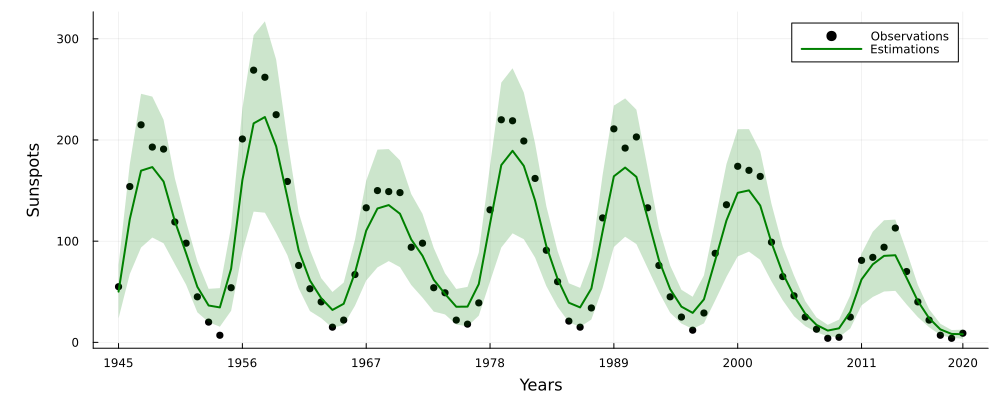

In [27]:
scatter(collect(1:N),dataset,color=:black,size=(900,200),legend=:topright, 
        xtick=([1, 12, 23, 34, 45, 56, 67, 76], [1945, 1956, 1967, 1978, 1989, 2000, 2011, 2020]), 
        xlabel="Years", ylabel="Sunspots", label="Observations", left_margin = 10Plots.mm, bottom_margin = 5Plots.mm)
plot!(mean_list,ribbon=var_list,label="Estimations", lw=2, size=(1000,400),color=:green,fillalpha=0.2)

In [30]:
open("results/nuts_sunspot_results.csv", "w") do io
    writedlm(io, [mean_list var_list])
end

In [29]:
sqrt(mean((not_rounded - mean_list).^2))

20.108547072299178